## Functions for kite and dart

In [2]:
using Pkg
Pkg.add("Luxor")
Pkg.add("Colors")
using Luxor
using Colors

   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\17404\.julia\environments\v1.7\Manifest.toml`


In [3]:
phi = (1 + sqrt(5)) / 2

1.618033988749895

In [4]:
sidelength = 100

100

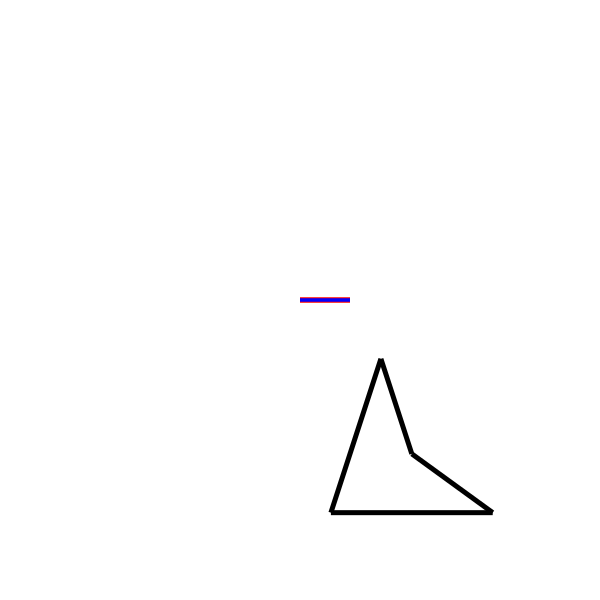

In [28]:
function dart(radialdistance, polarangle, orientation)
    ```
    radialdistance is the distance between rotation center and the origin
    polarangle is the turing angle before the turle move forward by r
    orientation is the rotation degrees of starting drawing the dart or kite
    ```
    
    Penup(t)
    Turn(t, polarangle)
    Forward(t, radialdistance)
    Turn(t, -polarangle)
    Turn(t, orientation)
    Pendown(t)
    
    Pencolor(t, "Black")
    Forward(t, sidelength)
    Turn(t, -36)
    Forward(t, sidelength)
    Turn(t, 144)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 144)
    
    Penup(t)
    Turn(t, -orientation)
    Turn(t, polarangle)
    Forward(t, -radialdistance)
    Turn(t, -polarangle)
    Pendown(t)
end

@draw begin
    t = Turtle()
    Penwidth(t,5)
    
    Pencolor(t, "Red")
    Forward(t, 50)
    Forward(t, -50)
    
    dart(100,36,72)
    
    Penwidth(t,3)
    Pencolor(t, "Blue")
    Forward(t, 50)
    Forward(t, -50)
end

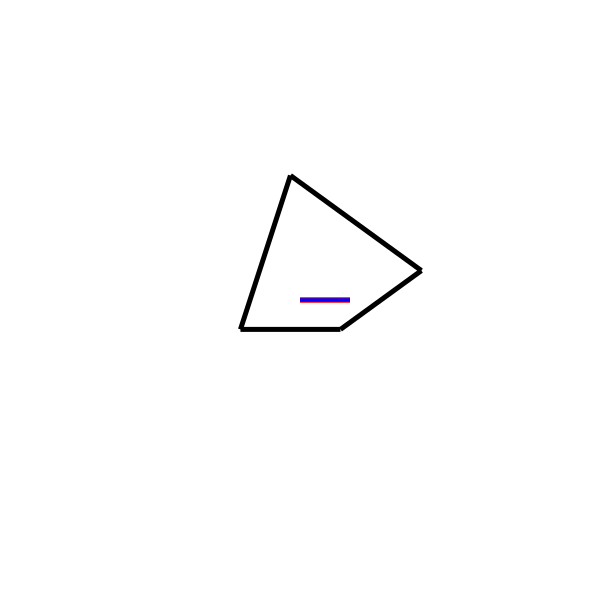

In [123]:
function kite(radialdistance, polarangle, orientation)
    ```
    radialdistance is the distance between rotation center and the origin
    polarangle is the turing angle before the turle move forward by r
    orientation is the rotation degrees of starting drawing the dart or kite
    ```

    Penup(t)
    Turn(t, polarangle)
    Forward(t, radialdistance)
    Turn(t, -polarangle)
    Turn(t, orientation)
    Pendown(t)
    
    Pencolor(t, "Black")
    Turn(t, 108)
    Forward(t, sidelength)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength * phi)
    Turn(t, 108)
    Forward(t, sidelength)
    Turn(t, -72)
    
    Penup(t)
    Turn(t, -orientation)
    Turn(t, polarangle)
    Forward(t, -radialdistance)
    Turn(t, -polarangle)
    Pendown(t)
end

@draw begin
    t = Turtle()
    Penwidth(t,5)
    
    Pencolor(t, "Red")
    Forward(t, 50)
    Forward(t, -50)
    
    kite(50,36,72)
    
    Penwidth(t,3)
    Pencolor(t, "Blue")
    Forward(t, 50)
    Forward(t, -50)
end

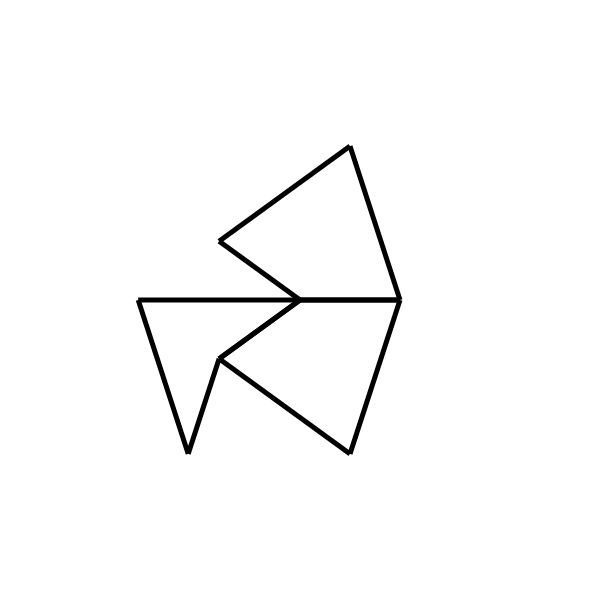

In [31]:
function subkite()
    kite(0,0,-108)

    kite(0,0,108)

    dart(0,0,144)
end

@draw begin
    t = Turtle()
    Penwidth(t,5)

    Pencolor(t, "Black")
    subkite()
end

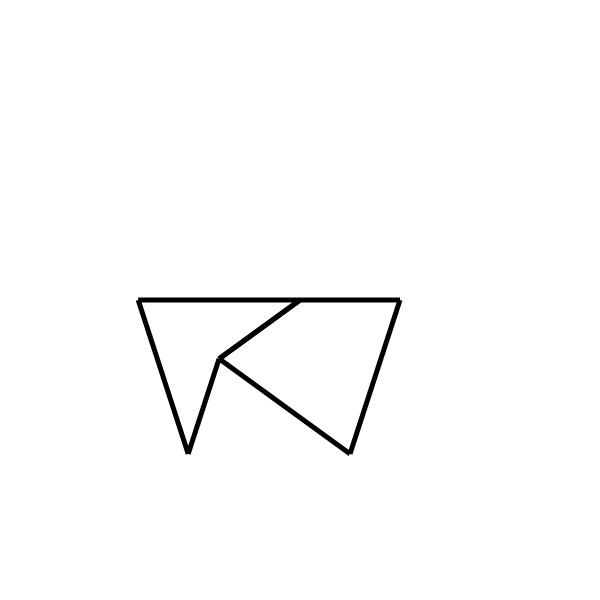

In [32]:
function subdart()

    kite(0,0,-108)

    dart(0,0,144)
end

@draw begin
    t = Turtle()
    Penwidth(t,5)

    Pencolor(t, "Black")
    subdart()
end

## functions of storage graphing information

In [33]:
graph = [["K",0,0,0],["D",0,0,0]]

2-element Vector{Vector{Any}}:
 ["K", 0, 0, 0]
 ["D", 0, 0, 0]

In [34]:
graph[1][1]

"K"

In [35]:
length(graph)

2

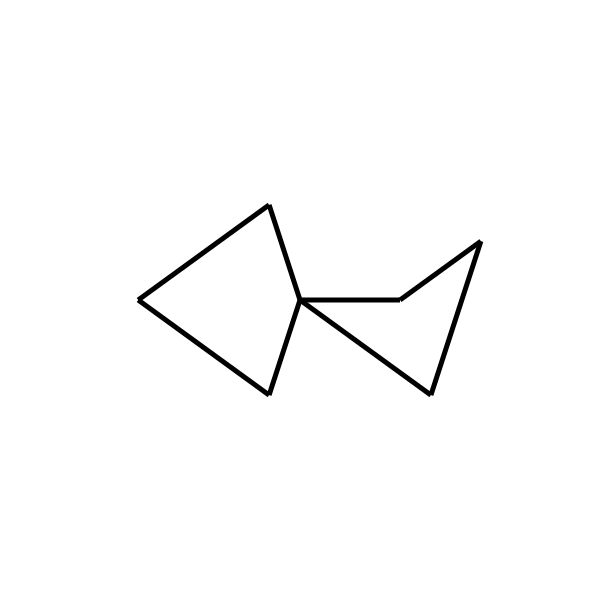

In [36]:
@draw begin
    t = Turtle()
    Penwidth(t,5)

    for i in 1:length(graph)
        if graph[i][1] == "K"
            kite(graph[i][2],graph[i][3],graph[i][4])
        else
            dart(graph[i][2],graph[i][3],graph[i][4])
        end
    end
end

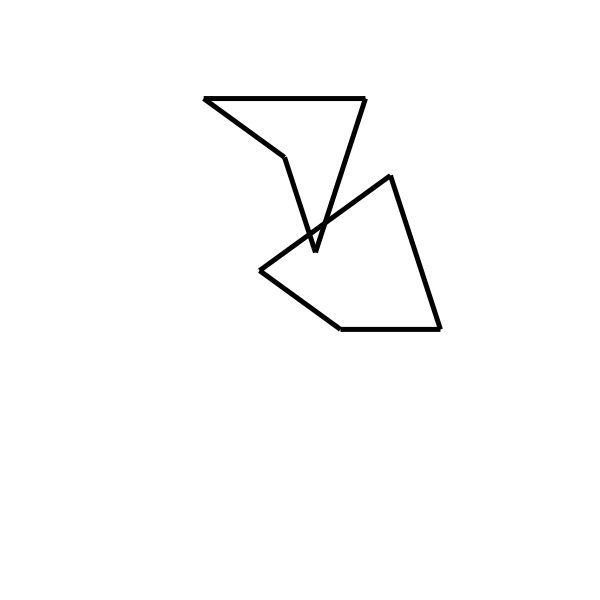

In [37]:
graph = [["K",50,36,108],["D",50,-72,-108]]

@draw begin
    t = Turtle()
    Penwidth(t,5)

    for i in 1:length(graph)
        if graph[i][1] == "K"
            kite(graph[i][2],graph[i][3],graph[i][4])
        else
            dart(graph[i][2],graph[i][3],graph[i][4])
        end
    end
end

In [38]:
function draw(graph)
    for i in 1:length(graph)
        if graph[i][1] == "K"
            kite(graph[i][2],graph[i][3],graph[i][4])
        else
            dart(graph[i][2],graph[i][3],graph[i][4])
        end
    end
end

draw (generic function with 1 method)

In [247]:
function substitution(graph)
    for i in 1:length(graph)
        
        if graph[i][1] == "K"
            y = graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * sin((180 - graph[1][4]) * pi / 180)
            x = graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * cos((180 - graph[1][4]) * pi / 180)
            new_radialdistance = sqrt(y^2+x^2)
                if x > 0
                    new_polorangle = atan(y/x) * 180 /pi
                elseif x < 0 && y >= 0
                    new_polorangle = atan(y/x) * 180 /pi + 180
                elseif x < 0 && y < 0
                    new_polorangle = atan(y/x) * 180 /pi - 180
                elseif x == 0 && y > 0
                    new_polorangle = 90
                elseif x == 0 && y < 0
                    new_polorangle = -90
                elseif x == 0 && y == 0
                    new_polorangle = 0
                end
            
            push!(graph, ["K",new_radialdistance,-new_polorangle,graph[i][4] + 108])
            push!(graph, ["K",new_radialdistance,-new_polorangle,graph[i][4] - 108])
            push!(graph, ["D",new_radialdistance,-new_polorangle,graph[i][4] + 144])
        else
            y = graph[i][2] * sin(-(graph[i][3] * pi / 180)) + sidelength * phi * sin(-(graph[i][4] * pi / 180))
            x = graph[i][2] * cos(-(graph[i][3] * pi / 180)) + sidelength * phi * cos(-(graph[i][4] * pi / 180))
            new_radialdistance = sqrt(y^2+x^2)
                if x > 0
                    new_polorangle = atan(y/x) * 180 /pi
                elseif x < 0 && y >= 0
                    new_polorangle = atan(y/x) * 180 /pi + 180
                elseif x < 0 && y < 0
                    new_polorangle = atan(y/x) * 180 /pi - 180
                elseif x == 0 && y > 0
                    new_polorangle = 90
                elseif x == 0 && y < 0
                    new_polorangle = -90
                elseif x == 0 && y == 0
                    new_polorangle = 0
                end
            
            push!(graph, ["K",new_radialdistance,-new_polorangle,graph[i][4] - 108])
            push!(graph, ["D",new_radialdistance,-new_polorangle,graph[i][4] + 144])
        end
    end
end

substitution (generic function with 1 method)

In [222]:
graph = [["D",50,-72,-108]]
substitution(graph)
graph

3-element Vector{Vector{Any}}:
 ["D", 50, -72, -108]
 ["K", 204.3783497126064, -99.73230144770194, -216]
 ["D", 204.3783497126064, -99.73230144770194, 36]

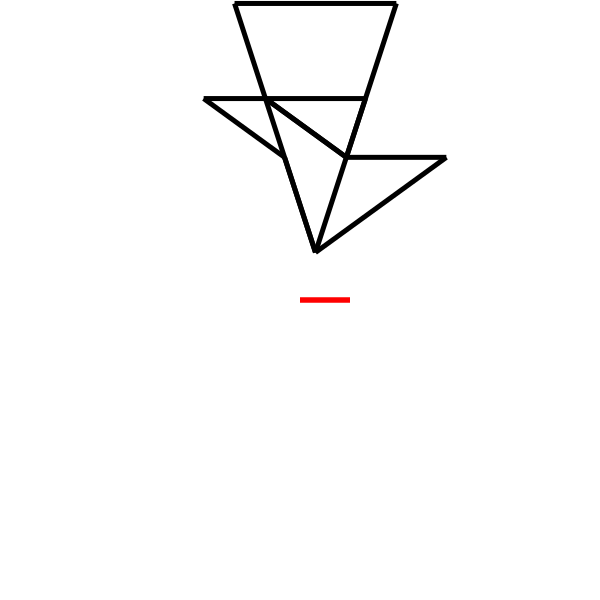

In [223]:
@draw begin
    t = Turtle()
    Penwidth(t,5)

    Pencolor(t, "Red")
    Forward(t, 50)
    Forward(t, -50)
    draw(graph)
end

In [246]:
graph = [["K",150,72,144]]
y = graph[1][2] * sin(-(graph[1][3] * pi / 180)) + sidelength * sin((180 - graph[1][4]) * pi / 180)

-83.8799522150257

In [248]:
graph = [["K",150,72,144]]
substitution(graph)
graph

4-element Vector{Vector{Any}}:
 ["K", 150, 72, 144]
 ["K", 152.41223759512087, 33.39097247869666, 252]
 ["K", 152.41223759512087, 33.39097247869666, 36]
 ["D", 152.41223759512087, 33.39097247869666, 288]

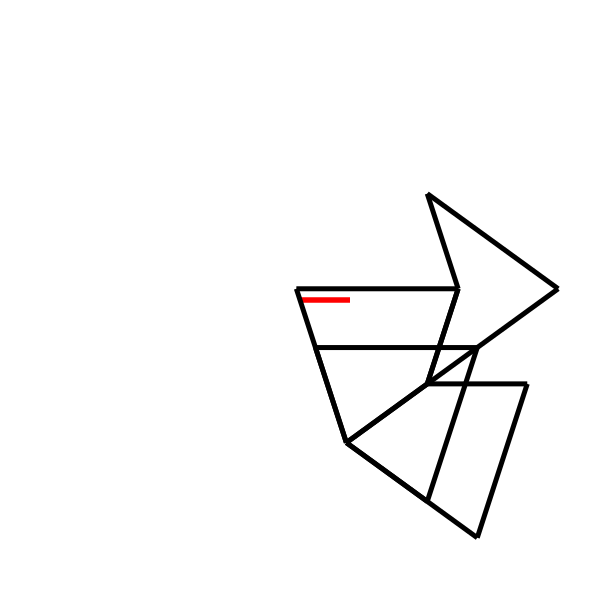

In [249]:
@draw begin
    t = Turtle()
    Penwidth(t,5)

    Pencolor(t, "Red")
    Forward(t, 50)
    Forward(t, -50)
    draw(graph)
end